# Week 6 - Deep Learning

The goal of this assignment is to test and compare some simple deep learning architectures for the problem of image classification. We will be using the Tensorflow framework.
The CIFAR-10 dataset contains 60000 images divided into 10 classes. The set is split in 50000 and 10000 samples for the training and testing set, respectively. The tutorial found at [https://www.tensorflow.org/tutorials/images/cnn] gives a good introduction to this practical exercise. The essential code for this tutorial can be found in the provided script 'ConvNet.py' or as a Jupyter notebook in [https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb].

## Imports

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RNDS = 1389

2023-10-07 14:31:34.100683: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-07 14:31:34.129123: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-07 14:31:34.129147: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-07 14:31:34.129162: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-07 14:31:34.134605: I tensorflow/core/platform/cpu_feature_g

In [4]:
if tf.test.is_gpu_available():
  device = "/GPU:0"
else:
  device =  "/CPU:0"

device

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-10-07 14:31:35.768802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:35.772525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:35.772551: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:36.576781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:36.576839: I tensorflow/compile

'/GPU:0'

## Data

In [5]:
with tf.device(device):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    train_images, test_images = train_images / 255.0, test_images / 255.0 # normalise pixel values to be between 0 and 1

2023-10-07 14:31:36.587021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:36.587086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:36.587102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:36.587238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-07 14:31:36.587255: I tensorflow/compile

## MLP

In [6]:
model = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/home/marco/miniconda3/envs/tf/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_16302/3543844174.py", line 9, in <module>

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1127, in train_step

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1185, in compute_loss

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_519]

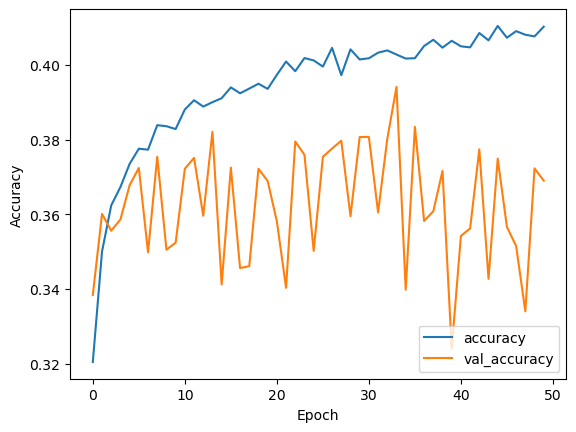

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## ConvNet

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # from this we know that input dimensions are 32x32x3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5252 - accuracy: 0.4445 - val_loss: 1.2225 - val_accuracy: 0.5657
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1642 - accuracy: 0.5877 - val_loss: 1.1179 - val_accuracy: 0.5959
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0151 - accuracy: 0.6405 - val_loss: 1.0399 - val_accuracy: 0.6289
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9174 - accuracy: 0.6772 - val_loss: 1.0570 - val_accuracy: 0.6359
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8460 - accuracy: 0.7011 - val_loss: 0.9351 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7876 - accuracy: 0.7234 - val_loss: 0.9069 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7424 - accuracy: 0.7416 - val_loss: 0.8969 - val_accuracy

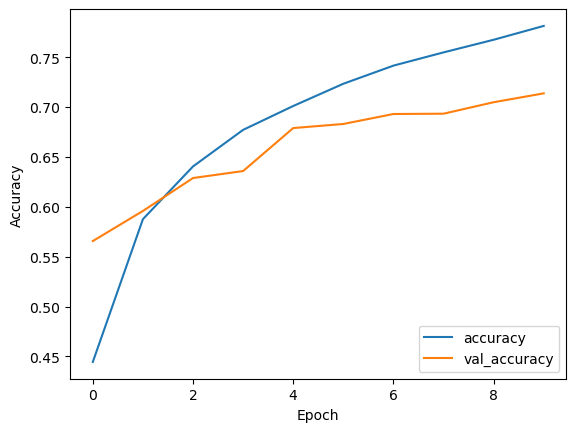

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Utility

In [6]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## Exercise 1

Modify the provided MLP model. Use architectures with 0, 1 and 2 hidden layers. Keep the complexity of the model bounded, so runs do not take much more than 1 hour to reach the maximum of testing accuracy. Notice that the input needs to be "flattened", since there is no spatial structure 
in this fully connected design. This can be achieved by adding a dummy layer with no free parameters with "layers.Flatten()" as the first layer in the constructor "model.Sequential()". Obtain the learning curves and discuss the results.
Report the optimizer in use, initialization parameters, the learning rate, etc. Is early stopping convenient in this model?

### Models

In [12]:
# 0 layers
mlp_0_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])
mlp_0_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 1 layer
mlp_1_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(1536, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_1_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2 layers
mlp_2_layer = models.Sequential([
    layers.Flatten(),
    layers.Dense(1536, activation='relu'),
    layers.Dense(768, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mlp_2_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7544 - accuracy: 0.4057 - f1_score: 3.7955 - val_loss: 1.8743 - val_accuracy: 0.3649 - val_f1_score: 3.7753
Epoch 2/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7576 - accuracy: 0.4038 - f1_score: 3.7936 - val_loss: 1.8859 - val_accuracy: 0.3553 - val_f1_score: 3.7621
Epoch 3/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7575 - accuracy: 0.4015 - f1_score: 3.7766 - val_loss: 1.9000 - val_accuracy: 0.3598 - val_f1_score: 3.6117
Epoch 4/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7578 - accuracy: 0.4045 - f1_score: 3.7642 - val_loss: 1.8762 - val_accuracy: 0.3659 - val_f1_score: 3.8537
Epoch 5/1000
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7562 - accuracy: 0.4027 - f1_score: 3.7715 - val_loss: 1.9996 - val_accuracy: 0.3232 - val_f1_score: 3.3427
Epoch 6/1000
1563/1563 [==============================] - 6s

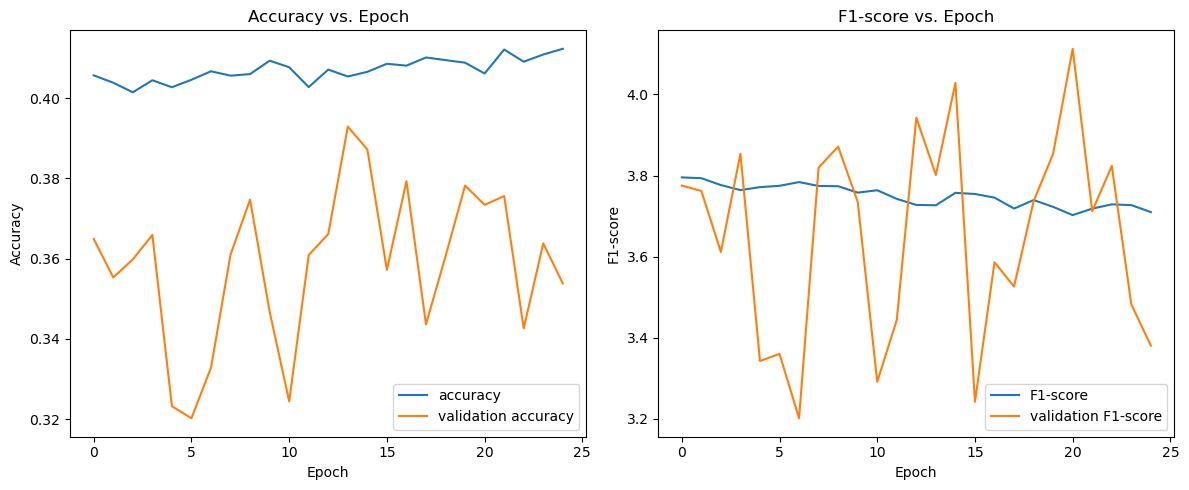

In [17]:
# fitting for 0 layer model
mlp_0_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_0_layer = mlp_0_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_0_layer.summary()

test_loss, test_acc, test_f1 = mlp_0_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_0_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_0_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_0_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_0_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

Epoch 1/400


2023-10-06 08:23:08.242928: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe4802edce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-06 08:23:08.242968: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-06 08:23:08.258353: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-06 08:23:08.552048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-06 08:23:08.639042: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 13s 7ms/step - loss: 1.9027 - accuracy: 0.3311 - f1_score: 5.6518 - val_loss: 1.7009 - val_accuracy: 0.4008 - val_f1_score: 5.5628
Epoch 2/400
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6916 - accuracy: 0.3977 - f1_score: 4.7480 - val_loss: 1.6932 - val_accuracy: 0.4014 - val_f1_score: 4.6870
Epoch 3/400
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6127 - accuracy: 0.4277 - f1_score: 4.3462 - val_loss: 1.5962 - val_accuracy: 0.4312 - val_f1_score: 4.0889
Epoch 4/400
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5660 - accuracy: 0.4435 - f1_score: 4.1239 - val_loss: 1.5565 - val_accuracy: 0.4465 - val_f1_score: 3.9575
Epoch 5/400
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5335 - accuracy: 0.4559 - f1_score: 3.9693 - val_loss: 1.5824 - val_accuracy: 0.4388 - val_f1_score: 3.8042
Epoch 6/400
1563/1563 [==============================] - 10s 6ms/step - 

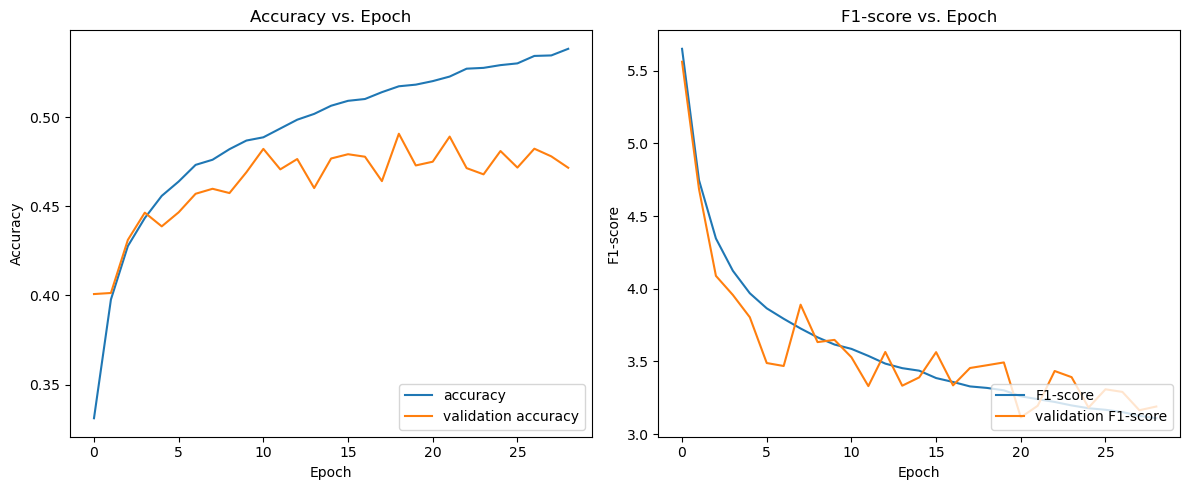

In [13]:
# fitting for 1 layer model
with tf.device(device):
    mlp_1_layer.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', f1_score])

    history_mlp_1_layer = mlp_1_layer.fit(train_images, train_labels, epochs=400,
                        validation_data=(test_images, test_labels), callbacks=[early_stop])

    mlp_1_layer.summary()

    test_loss, test_acc, test_f1 = mlp_1_layer.evaluate(test_images, test_labels)

    # plotting
    plt.figure(figsize=(12, 5))
    # accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_mlp_1_layer.history['accuracy'], label='accuracy')
    plt.plot(history_mlp_1_layer.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy vs. Epoch')
    # F1-score
    plt.subplot(1, 2, 2)
    plt.plot(history_mlp_1_layer.history['f1_score'], label='F1-score')
    plt.plot(history_mlp_1_layer.history['val_f1_score'], label='validation F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('F1-score')
    plt.legend(loc='lower right')
    plt.title('F1-score vs. Epoch')
    plt.tight_layout()
    plt.show()

Epoch 1/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8717 - accuracy: 0.3324 - f1_score: 5.5024 - val_loss: 1.6605 - val_accuracy: 0.4080 - val_f1_score: 4.7526
Epoch 2/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6571 - accuracy: 0.4046 - f1_score: 4.5008 - val_loss: 1.6624 - val_accuracy: 0.3983 - val_f1_score: 3.7688
Epoch 3/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5795 - accuracy: 0.4342 - f1_score: 4.1556 - val_loss: 1.6076 - val_accuracy: 0.4262 - val_f1_score: 4.6575
Epoch 4/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5294 - accuracy: 0.4521 - f1_score: 3.9566 - val_loss: 1.5706 - val_accuracy: 0.4369 - val_f1_score: 3.8463
Epoch 5/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4939 - accuracy: 0.4663 - f1_score: 3.8137 - val_loss: 1.5106 - val_accuracy: 0.4572 - val_f1_score: 3.7242
Epoch 6/1000
1563/1563 [==============================] - 9s

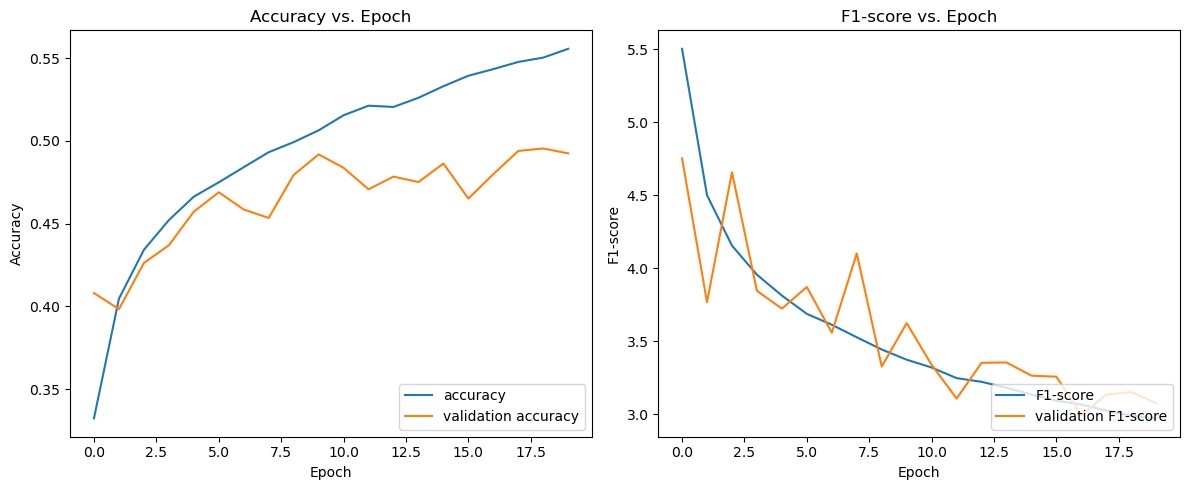

In [19]:
# fitting for 2 layer model
mlp_2_layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_score])

history_mlp_2_layer = mlp_2_layer.fit(train_images, train_labels, epochs=400,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

mlp_2_layer.summary()

test_loss, test_acc, test_f1 = mlp_2_layer.evaluate(test_images, test_labels)

# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_2_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_2_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_2_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_2_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

## Exercise 2

Reuse the code from Exercise 1 to build and run an MLP with one hidden layer, as big a you can. Compare the performance of your design with the results appearing in Table 1 of [https://arxiv.org/pdf/1611.03530.pdf] for an MLP of 512 units in a single hidden layer. Report the best result found for a maximum of 1000 epochs or 2 hours CPU running time.
The best accuracy amongst all teams will be awarded extra points.

In [8]:
import time

class TimeStopping(tf.keras.callbacks.Callback):
    def __init__(self, seconds):
        super(TimeStopping, self).__init__()
        # Stop training after `seconds` seconds have passed
        self.seconds = seconds
        self.start_time = None

    def on_train_begin(self, logs=None):
        # Record the time at which training begins
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        # Check how much time has passed, and stop training if necessary
        elapsed_time = time.time() - self.start_time
        if elapsed_time > self.seconds:
            self.model.stop_training = True
            print(f"\nStopping training: elapsed time {elapsed_time:.2f}s > limit {self.seconds}s")


In [9]:
with tf.device(device):
    # we have to have an actual validation set for this, we cannot evaluate the model properly otherwise
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=RNDS)
    # we need to augment our data to improve the model's performance, otherwise it'll get stuck like models from exercise 1
    train_datagen = ImageDataGenerator(rotation_range=0, horizontal_flip=True) # randomly rotates the image and/or flips it horizontally
    train_datagen.fit(train_images)
    val_datagen = ImageDataGenerator() # does nothing
    val_datagen.fit(train_images)

In [14]:
tf.debugging.set_log_device_placement(True)
batch_size = 256 
with tf.device(device):
    weight_decay = 0.01 # for dense layers
    alpha_value = 0.1 # for LeakyReLU
    num_epochs = 1000 # to be within 2 CPU hours

    # redefine our 1 layer model
    mlp_1_layer = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        #layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)), # let's try to not run out of memory, LOL
        layers.Dense(8192, activation='relu'),
        #layers.LeakyReLU(alpha=alpha_value),
        layers.Dense(10, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=.003)

    mlp_1_layer.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy', f1_score])

    # early_stop = EarlyStopping(monitor='val_accuracy', patience=num_epochs // 20) # since we're interested in accuracy now
    time_stopping_callback = TimeStopping(seconds=7200)
    checkpoint = ModelCheckpoint('./models/ass5_mlp_1_layer.h5', monitor='val_accuracy', save_best_only=True)

    mlp_1_layer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 8192)              25174016  
                                                                 
 dense_7 (Dense)             (None, 10)                81930     
                                                                 
Total params: 25255946 (96.34 MB)
Trainable params: 25255946 (96.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
with tf.device(device):
    #history_mlp_1_layer = mlp_1_layer.fit(datagen.flow(train_images, train_labels, batch_size=32),
    #                                     epochs=num_epochs,
    #                                     validation_data=(val_images, val_labels),
    #                                     callbacks=[early_stop, checkpoint],
    #                                     steps_per_epoch=len(train_images) // 32) # number of batches per epoch
    history_mlp_1_layer = mlp_1_layer.fit(train_datagen.flow(train_images, train_labels, batch_size=batch_size),
                                        validation_data=val_datagen.flow(val_images, val_labels, batch_size=batch_size),
                                        callbacks=[checkpoint, time_stopping_callback],
                                        epochs=num_epochs,
                                        steps_per_epoch=len(train_images) // batch_size)

    best_model = models.load_model('./models/ass5_mlp_1_layer.h5', custom_objects={'f1_score': f1_score})
    test_loss, test_acc, test_f1 = best_model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc*100:.4f}%", f"Test F1-Score: {test_f1:.4f}")

Epoch 1/1000


2023-10-07 14:32:18.639153: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4f34037110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-07 14:32:18.639195: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-07 14:32:18.643086: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-07 14:32:18.770464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-07 14:32:18.845526: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


156/156 [==============================] - ETA: 0s - loss: 8.0765 - accuracy: 0.2721 - f1_score: 0.0833

/home/marco/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 7s 33ms/step - loss: 8.0765 - accuracy: 0.2721 - f1_score: 0.0833 - val_loss: 1.8241 - val_accuracy: 0.3402 - val_f1_score: 0.1347
Epoch 2/1000
 15/156 [=>............................] - ETA: 3s - loss: 1.7802 - accuracy: 0.3492 - f1_score: 0.1562

KeyboardInterrupt: 

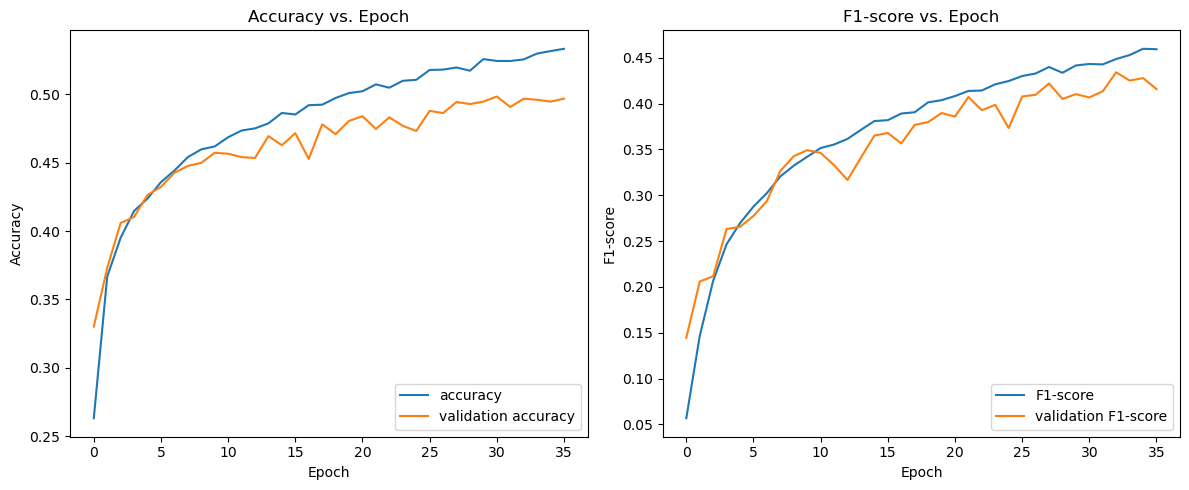

In [14]:
# plotting
plt.figure(figsize=(12, 5))
# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp_1_layer.history['accuracy'], label='accuracy')
plt.plot(history_mlp_1_layer.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy vs. Epoch')
# F1-score
plt.subplot(1, 2, 2)
plt.plot(history_mlp_1_layer.history['f1_score'], label='F1-score')
plt.plot(history_mlp_1_layer.history['val_f1_score'], label='validation F1-score')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.title('F1-score vs. Epoch')
plt.tight_layout()
plt.show()

## Exercise 3

Study the performance properties of the convolutional network provided. How is the learning affected if instead of ReLU units, tanh() activations are used? What is the reason for this? Compare also at least two different optimizer algorithms.

## Exercise 4

Try to outperform the convolutional network from Exercise 3 with an MLP that uses approximately the same number of parameters.
Report your results and explain them.